In [1]:
import re
import nltk.corpus 
import nltk.stem 
import numpy as np
import pandas as pd
from string import punctuation 
from sklearn import metrics 
from sklearn.cluster import KMeans 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import KFold 
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cdist,pdist


ImportError: No module named gensim

In [2]:
data=fetch_20newsgroups(subset='all',
                              # categories=categories,
                                remove=('headers','footers','quotes'),
                                shuffle=True,random_state=1)
print("Number of docs: %d" % len(data.data))
print("Number of categories: %d" % len(data.target_names))
categories=[data.target_names]
i = 0
for cat in range(len(data.target_names)):
    cat_name = data.target_names[cat]
    num_docs = len([d for d in data.target if d == i])
    print("Category %d (%s): %d docs" % (i, cat_name, num_docs))
    i += 1

num_categories = np.unique(categories).shape[0]

Number of docs: 18846
Number of categories: 20
Category 0 (alt.atheism): 799 docs
Category 1 (comp.graphics): 973 docs
Category 2 (comp.os.ms-windows.misc): 985 docs
Category 3 (comp.sys.ibm.pc.hardware): 982 docs
Category 4 (comp.sys.mac.hardware): 963 docs
Category 5 (comp.windows.x): 988 docs
Category 6 (misc.forsale): 975 docs
Category 7 (rec.autos): 990 docs
Category 8 (rec.motorcycles): 996 docs
Category 9 (rec.sport.baseball): 994 docs
Category 10 (rec.sport.hockey): 999 docs
Category 11 (sci.crypt): 991 docs
Category 12 (sci.electronics): 984 docs
Category 13 (sci.med): 990 docs
Category 14 (sci.space): 987 docs
Category 15 (soc.religion.christian): 997 docs
Category 16 (talk.politics.guns): 910 docs
Category 17 (talk.politics.mideast): 940 docs
Category 18 (talk.politics.misc): 775 docs
Category 19 (talk.religion.misc): 628 docs


In [10]:
import nltk
nltk.download('stopwords')

from nltk.stem.snowball import SnowballStemmer
english_stemmer = SnowballStemmer("english", ignore_stopwords=True)

from sklearn.feature_extraction.text import TfidfVectorizer
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer,self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))



[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [11]:
vectorizer = StemmedTfidfVectorizer(min_df=1,stop_words='english')
vectorized=vectorizer.fit_transform(data.data)

In [12]:
print(vectorized.shape)

(18846, 112710)


In [113]:
num_clusters = range(1,21)
from sklearn.cluster import KMeans
kms=[KMeans(n_clusters=k, init='random', n_init=1,verbose=1).fit(vectorized) for k in  num_clusters]


Initialization complete
Iteration  0, inertia 36654.863
Iteration  1, inertia 18098.006
Converged at iteration 1: center shift 0.000000e+00 within tolerance 8.520186e-10
Initialization complete
Iteration  0, inertia 36637.209
Iteration  1, inertia 18064.827
Iteration  2, inertia 18044.928
Iteration  3, inertia 18043.019
Iteration  4, inertia 18042.628
Iteration  5, inertia 18042.465
Iteration  6, inertia 18042.352
Iteration  7, inertia 18042.269
Iteration  8, inertia 18042.212
Iteration  9, inertia 18042.174
Iteration 10, inertia 18042.143
Iteration 11, inertia 18042.116
Iteration 12, inertia 18042.096
Iteration 13, inertia 18042.080
Iteration 14, inertia 18042.069
Iteration 15, inertia 18042.056
Iteration 16, inertia 18042.039
Iteration 17, inertia 18042.022
Iteration 18, inertia 18042.007
Iteration 19, inertia 18041.996
Iteration 20, inertia 18041.979
Iteration 21, inertia 18041.963
Iteration 22, inertia 18041.945
Iteration 23, inertia 18041.927
Iteration 24, inertia 18041.906
Iterat

Iteration 95, inertia 17822.224
Iteration 96, inertia 17822.221
Iteration 97, inertia 17822.219
Iteration 98, inertia 17822.217
Iteration 99, inertia 17822.217
Iteration 100, inertia 17822.214
Iteration 101, inertia 17822.213
Iteration 102, inertia 17822.213
Converged at iteration 102: center shift 0.000000e+00 within tolerance 8.520186e-10
Initialization complete
Iteration  0, inertia 35492.935
Iteration  1, inertia 17972.759
Iteration  2, inertia 17893.488
Iteration  3, inertia 17861.075
Iteration  4, inertia 17844.194
Iteration  5, inertia 17833.445
Iteration  6, inertia 17825.497
Iteration  7, inertia 17821.162
Iteration  8, inertia 17818.557
Iteration  9, inertia 17816.499
Iteration 10, inertia 17813.939
Iteration 11, inertia 17810.542
Iteration 12, inertia 17807.371
Iteration 13, inertia 17805.589
Iteration 14, inertia 17804.689
Iteration 15, inertia 17804.307
Iteration 16, inertia 17803.946
Iteration 17, inertia 17803.711
Iteration 18, inertia 17803.560
Iteration 19, inertia 178

Iteration 21, inertia 17702.932
Iteration 22, inertia 17702.918
Iteration 23, inertia 17702.909
Iteration 24, inertia 17702.905
Iteration 25, inertia 17702.902
Iteration 26, inertia 17702.900
Iteration 27, inertia 17702.898
Iteration 28, inertia 17702.896
Iteration 29, inertia 17702.894
Iteration 30, inertia 17702.893
Iteration 31, inertia 17702.891
Iteration 32, inertia 17702.891
Converged at iteration 32: center shift 0.000000e+00 within tolerance 8.520186e-10
Initialization complete
Iteration  0, inertia 18278.569
Iteration  1, inertia 18079.600
Iteration  2, inertia 18077.979
Iteration  3, inertia 18069.075
Iteration  4, inertia 18064.954
Iteration  5, inertia 18063.963
Iteration  6, inertia 18063.489
Iteration  7, inertia 18063.257
Iteration  8, inertia 18063.145
Iteration  9, inertia 18063.073
Iteration 10, inertia 18063.019
Iteration 11, inertia 18062.992
Iteration 12, inertia 18062.964
Iteration 13, inertia 18062.949
Iteration 14, inertia 18062.943
Converged at iteration 14: ce

In [114]:
print("---------SKlearn-----------------")
import matplotlib.pyplot as plt 
NMIs=[normalized_mutual_info_score(data.target , km.labels_) for km in kms] 
print('NMI=', NMIs)

---------SKlearn-----------------
NMI= [-1.5265566588595902e-06, 0.2033157867064524, 0.22761168252056468, 0.24903482563496082, 0.2628779638397719, 0.25947223076071846, 0.00961556701430131, 0.15831337010517713, 0.2770798540978761, 0.3300807911076446, 0.015068500097613303, 0.2888022926729655, 0.2971839332238103, 0.3137928153383468, 0.321601224316706, 0.3392524299866129, 0.048103251855439164, 0.33518682072573863, 0.32152949305650586, 0.018613356717733842]


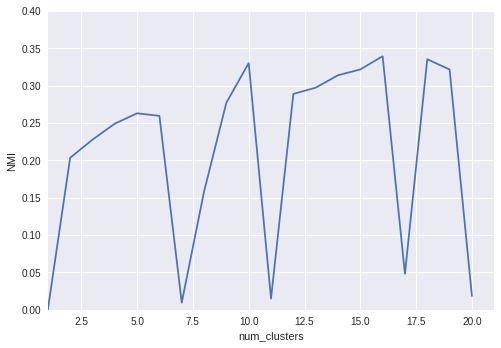

In [115]:
y=[NMIs[i] for i in range(0,20)]
x= range(1,21)
plt.plot(x,y)
plt.title("SKlearn")
plt.axis([1,21 ,0,0.4])
plt.xlabel("num_clusters")
plt.ylabel("NMI")
plt.show()

In [0]:
#-----------------------------------------------------------------
#----------------------Algorithm----------------------------------

In [13]:
def kmeans_init_centers(vector,k):
    return vector[np.random.choice(vector.shape[0],k,replace=False)]

#------------------------Gan nhan cho cac diem----------------------------

def kmeans_assign_labels(vector,center):
    # tinh khoang cach
    D = 1 - cosine_similarity(vector,center)
    # gan vao nhan gan nhat
    return np.argmin(D,axis=1)

#------------------------Tinh lai trung tam-------------------------------

def kmeans_update_centers(vector,labels,k):
    center=np.zeros((k,vector.shape[1]))
    for i in range(k):
        # cac diem trong cum thu i
        Xk=vector[labels==i,:]
        # tinh trung binh
        center[i,:]=np.mean(Xk,axis=0)
    return center

#-----------------------kiem tra dieu kien dung---------------------------
def has_converged(center,new_center):
    if (set([tuple(a) for a in center])==
        set([tuple(a) for a in new_center])):
        return True





In [14]:
def kmeans(vector,k):
    center=[kmeans_init_centers(vector,k)]
    labels=[]
    it=0
    while True:
        labels.append(kmeans_assign_labels(vector, center[-1]))
        new_center = kmeans_update_centers(vector, labels[-1], k)
        if has_converged(center[-1], new_center):
            break
        center.append(new_center)
        it += 1

    return (labels,it)



In [16]:
k=20
labels=kmeans(vectorized,k)


In [18]:
print("---------Algorithm-----------------")
import matplotlib.pyplot as plt 
NMI=[normalized_mutual_info_score(data.target , label[-1]) for label in labels] 



---------Algorithm-----------------


TypeError: 'int' object has no attribute '__getitem__'

In [16]:
y=[NMI[i] for i in range(0,20)]
x= range(1,21)
plt.title("Algorithm")
plt.plot(x,y)
plt.axis([1,21 ,0,0.4])
plt.xlabel("num_clusters")
plt.ylabel("NMI")
plt.show()

NameError: name 'NMI' is not defined